#Investigate a data set: TMDB Movie Data#
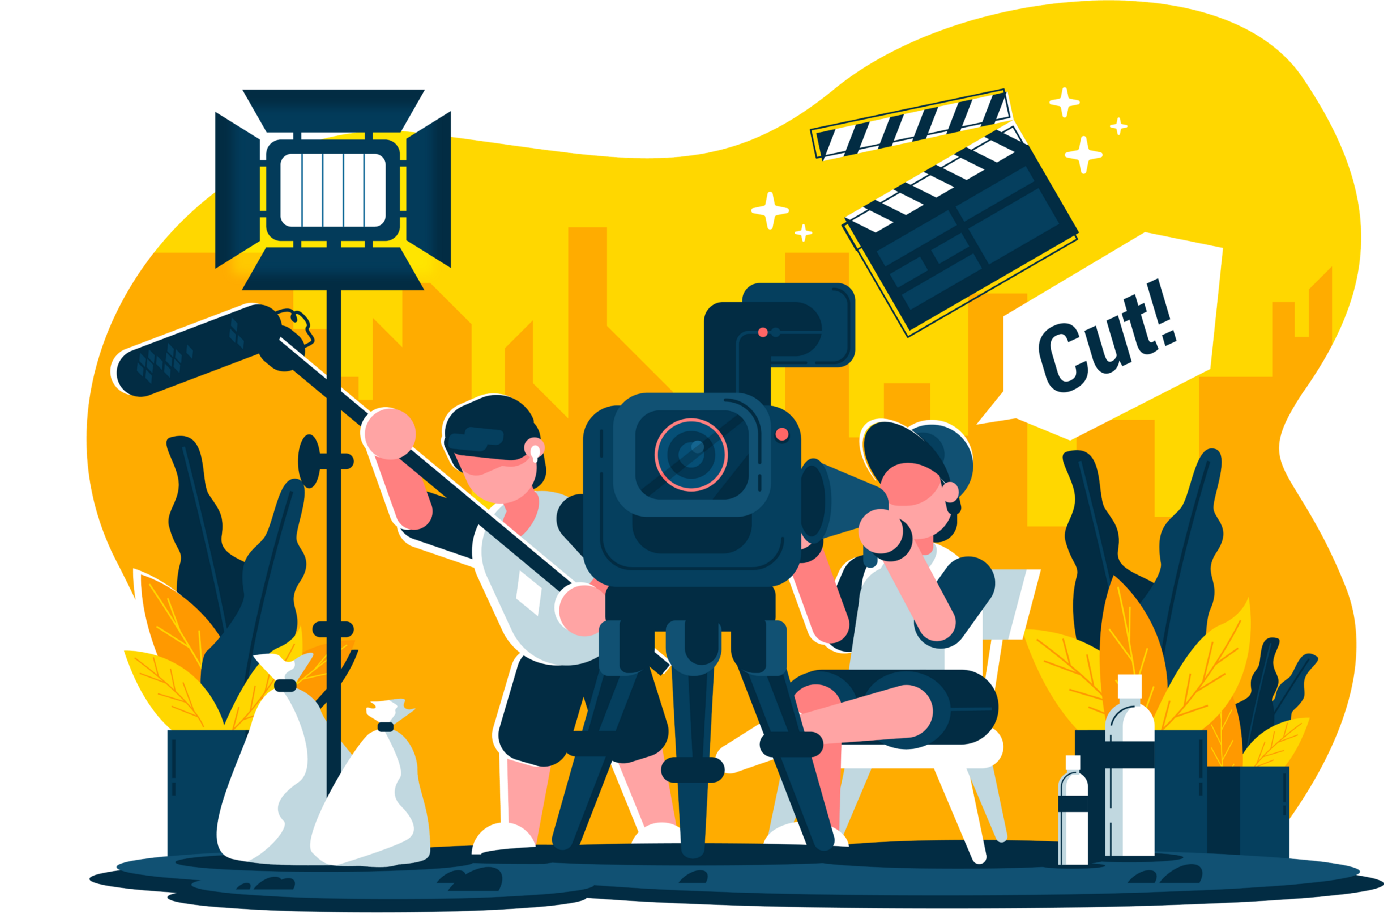

**Name**: Dayron Tula

Udacity Data Analyst Nanodegree 

##**Introduction**##

The data introduces a large set of movie information including but not limited to revenue, budgets, and popularity. The purpose of this analysis is to dig into our curiosity to know more about what makes a great movie or successful film. Furthermore, we will be asking questions to the dataset to find if any correlations exists that may determine or supplement our findings. 

##**Table of Content**##

- Questions 
- Data Wrangling 
- Analysis
- Conclusion

###**Questions**###

1. What is the highest earning film?
2. Based on popularity, what is the best genre?
3. Does higher spending provide higher revenue?

###**Data Wrangling**###

Data wrangling is used to make data readable and easy to manipulate into building something useful. This step is the most important because it builds the foundation needed to then breakdown the analysis and if the foundation is weak then the findings will most likely be as well.

The steps include importing packages and cleaning the data: 

**Packages used**: Pandas, Numpy, Matplotlib.

**Data**: TMDB Movies dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

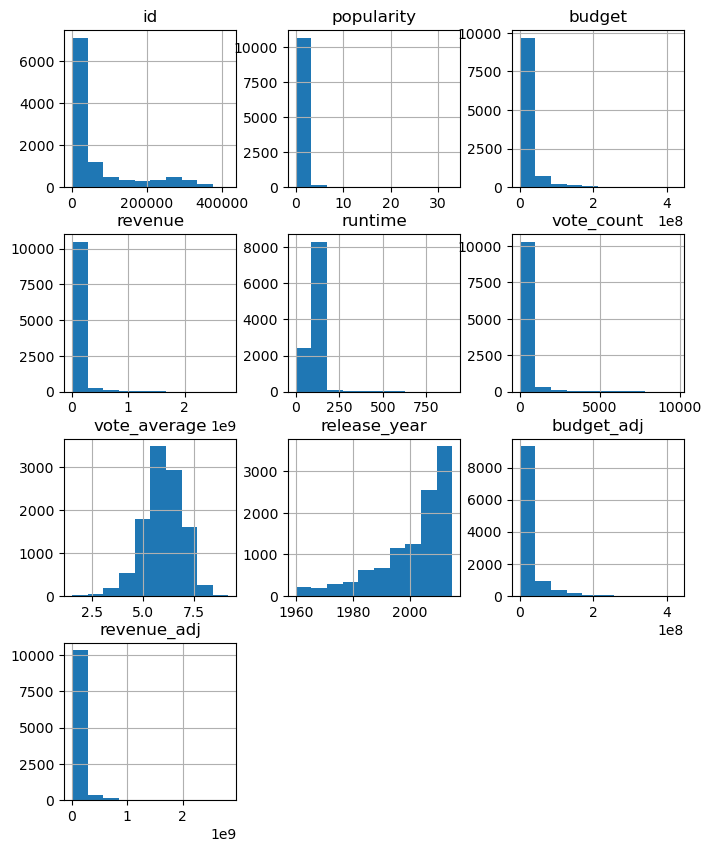

In [275]:
# Importing necessary packages, data, and dropping duplicate values for cleaning purposes.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('tmdb-movies.csv')
df.info()
df.hist(figsize=(8,10))

**Dropping duplicates amd cleaning Data**

In [276]:
df.duplicated().sum()

1

In [277]:
# Dropping duplicate values 

df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

1 duplicare found and removed from the dataset

**Dropping unnecessary columns**

Will not be needing these columns for our analysis.

In [278]:
# Dropping uneccesary columns for the analysis and confirming. 

df = df.drop(['cast','homepage','tagline','vote_count','vote_average','overview'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   director              10821 non-null  object 
 7   keywords              9372 non-null   object 
 8   runtime               10865 non-null  int64  
 9   genres                10842 non-null  object 
 10  production_companies  9835 non-null   object 
 11  release_date          10865 non-null  object 
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(3), int6

**Checking for and removing null values**

In [279]:
# Checking for null values

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [280]:
# Removing null values in the dataset.

df.dropna(inplace=True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**Cleaning zero values from data**

Zero values have no use for our analysis.

In [281]:
# Checking for zero values in the data.

df.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,8689.000000,8689.000000,8.689000e+03,8.689000e+03,8689.000000,8689.00000,8.689000e+03,8.689000e+03
mean,57067.132236,0.740547,1.766413e+07,4.911827e+07,103.683738,2000.13776,2.125309e+07,6.345599e+07
std,86300.168460,1.086580,3.354077e+07,1.288070e+08,26.426200,13.21853,3.706874e+07,1.591100e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1960.00000,0.000000e+00,0.000000e+00
25%,9824.000000,0.249284,0.000000e+00,0.000000e+00,91.000000,1993.00000,0.000000e+00,0.000000e+00
50%,16225.000000,0.448325,1.300000e+06,1.577680e+05,100.000000,2004.00000,2.099042e+06,1.721430e+05
75%,54054.000000,0.839107,2.100000e+07,3.874840e+07,113.000000,2011.00000,2.808100e+07,5.495614e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,2015.00000,4.250000e+08,2.827124e+09


In [282]:
# Removing zero values.

budget = df.query('budget > 0')
runtime = df.query('runtime > 0')
budget.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,4733.000000,4733.000000,4.733000e+03,4.733000e+03,4733.000000,4733.000000,4.733000e+03,4.733000e+03
mean,42403.388126,1.049315,3.242840e+07,8.657655e+07,107.967462,2000.786182,3.901713e+07,1.103867e+08
std,70353.141835,1.371290,3.983212e+07,1.647565e+08,22.615324,11.929417,4.277379e+07,2.023212e+08
min,5.000000,0.002514,1.000000e+00,0.000000e+00,0.000000,1960.000000,9.210911e-01,0.000000e+00
25%,8077.000000,0.383044,7.000000e+06,3.038770e+05,94.000000,1995.000000,9.482821e+06,3.422377e+05
50%,11836.000000,0.670801,1.900000e+07,2.650132e+07,104.000000,2004.000000,2.500000e+07,3.518942e+07
75%,39561.000000,1.213405,4.000000e+07,9.818558e+07,118.000000,2010.000000,5.292074e+07,1.264790e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,2015.000000,4.250000e+08,2.827124e+09


**Create calculated field**

Time column is in minutes but we want it to be showned as hours. Also, creating a column named profit by substracting revenue with the budget. 

In [283]:
# Calculated fields

df['time']=df['runtime'].div(60)
df['profit'] = df['revenue']-df['budget']

**Summary**

The data cleaning process is essential to perform the analysis with the lowest error possibility. For this project, there were several actions taken to clean up the data, including:

1. Removed null values from the data since it had nothing to add to the analysis
2. Removed duplicate data to avoid innacurate results.
3. Dropped several columns that were not going to be part of my analysis to reduce the time having to look around in the dataset.
4. Separated columns by a delimiter to better understand the genre column and correctly analyze it.

Additionally, there are other processes that can also help clean up the data, for example:

- Using an if statement to filter the data down to specific findings or using >, <, == to grab data that meets the qualifications.

###**Data Analysis**###

The goal of this analysis is to find if any correlation exists between a movie earnings and other properties which can then determine if certain movies do better than others.

**1. What is the highest earning film?**

**Revenue Bar Chart**

The highest grossing movie in the dataset is Avatar released on December 10,2009 and running for 2.7 hours. It is incredible to believe that a movie with so many years is still the highest earning movie of all time. For curiosity, it would be good to know what makes this movie so successful.

**Analytical Process**
The first thing to do was to change the time column into hours by dividing the column by 60. Cleaned the data further by selecting a few columns from the dataset and sorting it by the revenue descending to find the top 10 highest earning movies. The data is visualized using a bar plot illustrating the movie title with the top 10 highest earned revenue.

In [284]:
# Selecting columns from data and sorting it by revenue.

top=df[['original_title','revenue','release_date','time','director','budget','genres','production_companies']].sort_values('revenue', ascending=False)


,original_title,revenue,release_date,time,director,budget,genres,production_companies
1386,Avatar,2781505847,12/10/09,2.700000,James Cameron,237000000,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...
3,Star Wars: The Force Awakens,2068178225,12/15/15,2.266667,J.J. Abrams,200000000,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
5231,Titanic,1845034188,11/18/97,3.233333,James Cameron,200000000,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...
4361,The Avengers,1519557910,4/25/12,2.383333,Joss Whedon,220000000,Science Fiction|Action|Adventure,Marvel Studios
0,Jurassic World,1513528810,6/9/15,2.066667,Colin Trevorrow,150000000,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
4,Furious 7,1506249360,4/1/15,2.283333,James Wan,190000000,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...
14,Avengers: Age of Ultron,1405035767,4/22/15,2.350000,Joss Whedon,280000000,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822,7/7/11,2.166667,David Yates,125000000,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...
5422,Frozen,1274219009,11/27/13,1.700000,Chris Buck|Jennifer Lee,150000000,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...
5425,Iron Man 3,1215439994,4/18/13,2.166667,Shane Black,200000000,Action|Adventure|Science Fiction,Marvel Studios


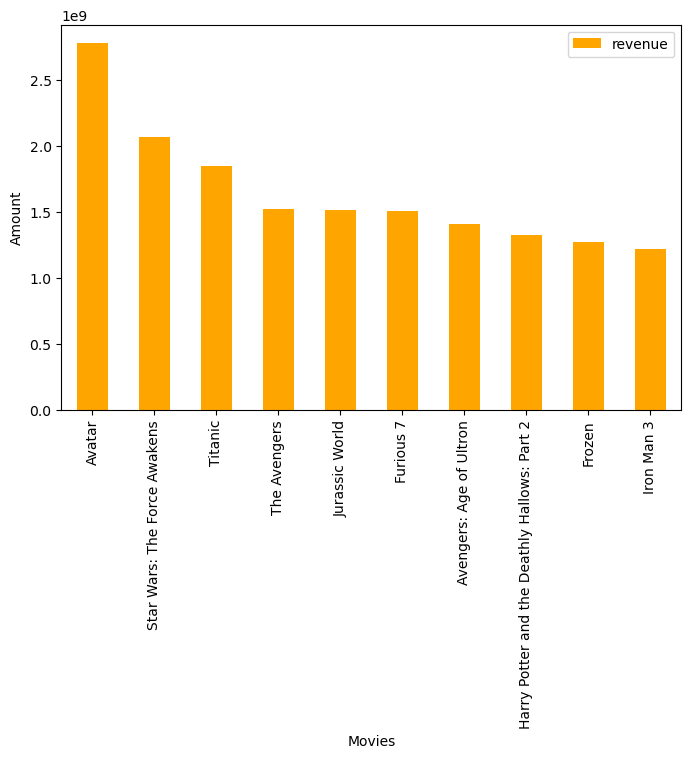

In [285]:
# Creating bar plot to display highest earning movies.

top.head(10).plot(x='original_title',y='revenue',kind='bar', color= 'orange', ylabel='Amount',xlabel='Movies', figsize=(8,5))
top.head(10)

**2. Based on popularity, what is the best genre?**

**Genre Popularity**

The findings indicate that Adventure movies have the highest popularity among all genres in the dataset. This data shows that genres like adventure, science fiction and action might be preferred by audiences over other genres, therefore; these films have a higher success rates. The movie Avatar classifies as an action,adventure and science fiction movie which could provide a reason why these genres are so popular with the audience. 

**Analytical Process**

Acquire the average popularity grouped by genre to show popularity among genres and visualized it using horizontal bar chart while making some visual adjustments to color and chart size.

In [286]:
# Separate column by delimiter for the analysis.

df['genres'] = df['genres'].str.split("|")
sep = df.explode('genres')


<AxesSubplot:ylabel='genres'>

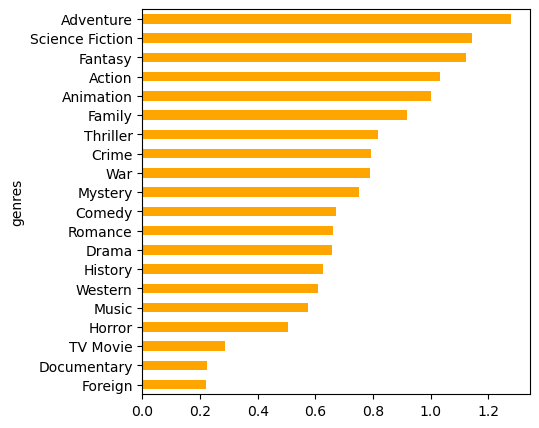

In [287]:
# Create a horizontal bar plot to illustrate most popular genres in the dataset.

chart = sep.groupby('genres')['popularity'].mean().sort_values()
chart.plot(x='genres',y='popularity',kind='barh', color='orange', figsize=(5,5))

**3. Does higher spending provide higher revenue?**

**Budget Analysis**

The findings below illustrate that the movie The Warrior's Way lost a ton of money due to their budget being so high and the revenue very low. Although, the second scatter plot shows that there is a correlation between higher budgets and higher profits. This is not always true in fact because two of the top 10 budget movies did not make a profit and ended up losing money. We also find that Walt Disney had 5 out of the top 10 budget films. On the other hand, Avatar did not have the top 10 budgets but classified as the most profitable movie of all time. The data also shows that director of the movie Avatar, James Cameron was the highest movie earning director in the dataset with a profit margin of .91 for the movie Avatar. 

**Analytical Process**

Created a profit column by substracting revenue and budget from the dataset. Added profit column to the data and sort it by the budget to show the top 10 highest budgeted movies. Created a scatterplot to show correlation between the budget and revenue, interestingly enough the budget of the movie did not necesseraily provide high revenue. Pulled another set of data showing the director's profit.


In [288]:
# Select certain columns from dataset, adding profit column, and sorting it by budget descending.  

budg = df[['original_title','budget','revenue','profit', 'production_companies']].sort_values('budget', ascending=False)
budg.head(10)

,original_title,budget,revenue,profit,production_companies
2244,The Warrior's Way,425000000,11087569,-413912431,Boram Entertainment Inc.
3375,Pirates of the Caribbean: On Stranger Tides,380000000,1021683000,641683000,Walt Disney Pictures|Jerry Bruckheimer Films|M...
7387,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,Walt Disney Pictures|Jerry Bruckheimer Films|S...
14,Avengers: Age of Ultron,280000000,1405035767,1125035767,Marvel Studios|Prime Focus|Revolution Sun Studios
6570,Superman Returns,270000000,391081192,121081192,DC Comics|Legendary Pictures|Warner Bros.|Bad ...
1929,Tangled,260000000,591794936,331794936,Walt Disney Pictures|Walt Disney Animation Stu...
4411,John Carter,260000000,284139100,24139100,Walt Disney Pictures
7394,Spider-Man 3,258000000,890871626,632871626,Columbia Pictures|Laura Ziskin Productions|Mar...
5508,The Lone Ranger,255000000,89289910,-165710090,Walt Disney Pictures|Jerry Bruckheimer Films|I...
4367,The Hobbit: An Unexpected Journey,250000000,1017003568,767003568,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...


The Warrior's Way and The Lone Ranger have losses as part of the top 10 highest budgeted films.

<AxesSubplot:xlabel='budget', ylabel='revenue'>

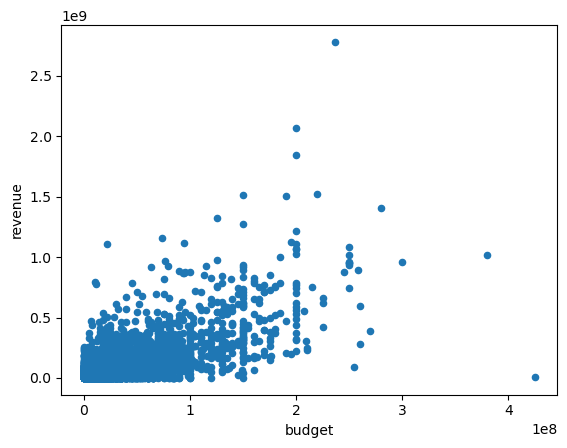

In [289]:
# Scatterplot to show correlation between bidget and revenue.

df.plot(x='budget',y='revenue',kind='scatter')

In [290]:
# Pull information with director profit made from highest to lowest.

df[['director','profit','revenue']].sort_values('profit', ascending=False).head(5)


,director,profit,revenue
1386,James Cameron,2544505847,2781505847
3,J.J. Abrams,1868178225,2068178225
5231,James Cameron,1645034188,1845034188
0,Colin Trevorrow,1363528810,1513528810
4,James Wan,1316249360,1506249360


Director James Cameron has the highest profit for movies made.

In [304]:
# Make a list of the directors included on the prior list.

dlist= df.loc[df['director'].isin(['James Cameron', 'J.J. Abrams', 'Colin Trevorrow', 'James Wan'])]

In [307]:
# Group by director and get the average revenue for director from highest to lowest.

dlist.groupby('director')[['revenue','profit']].mean().sort_values('revenue', ascending=False)

,revenue,profit
director,,
Colin Trevorrow,7.587683e+08,6.833933e+08
James Cameron,7.302369e+08,6.352494e+08
J.J. Abrams,7.158340e+08,5.678340e+08
James Wan,2.580453e+08,2.267078e+08


From the list of highest profitable movies, the director with the highest average revenue for movies is Colin Trevorrow. 

In [ ]:
# Acquire profit margin for director with the highest profit in the dataset.

def pm_function (n1,n2): 
    print( n1/n2)
    
pm_function (2544505847,2781505847)

In [ ]:
pm_function (1645034188,1845034188)

##**Conclusion**##

The dataset shows that movie genres like adventure, science fiction and fantasy are preferred by audience popularity rstings over the years. This analysis proves why movies like Avatar and Star Wars do so well in revenue and popularity.

1. What is the highest earning film?

Avatar has the highest revenue and profit earnings out of all the movies in the dataset. According to our findings diector James Cameron had the two top highest gross profit earnings out of all directors in the dataset.

2. Based on popularity, what is the best genre?

The best genres include adventure, science fiction, and fantasy. According to our findings the top 10 highest earning movies included these genres which leads us to believe these genres do better financially than others.

3. Does higher spending provide higher revenue?

Although our data shows that there is some correlation between budget spenditure and profit, some of our findings indicate otherwise. For example, the movie The Warrior's way had a large budget but ended up losing money, same goes for the movie The Lone Ranger. 

**Summary** 

The top 10 financially gifted movies are in the action, adventure, and science fiction genre. Leading the the chart is Avatar, Starwars and Titanic, two of these movies were directed by James Cameron which is also the highest movie revenue earner with a profit margin of .92 on Avatar and .89 on Titanic. The data does not fully indicate that movie budget has a conclusive correlation with revenue, in which case, Director and genre have a more understanding correlation with movie revenue and profits.  

**Limitations**

1. There is a lot of null values in the dataset which creates limitations when analyzing it.

2. Several cleaning process had to take place in order to avoid errors, ex. splitting the genre column.

3. Formatting issues with the data such as commas in numerical values and currency.

